# 샤프 지수란
## 위험 단위당 수익률
## 샤프지수 = (예상 수익률 - 무위험률) / 수익률 표준편차

In [1]:
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
import yfinance as yf
yf.pdr_override()

import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/Administrator/Desktop/stock_study/')

from Investar import Analyzer

c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
mk = Analyzer.MarketDB()

In [3]:
kr_stocks = ["삼성전자","한컴위드"]
am_stocks = ["TSLA","CHWY",]
# stocks = ["삼성전자","한컴위드"]

In [4]:
df = pd.DataFrame()
dollar = pd.read_csv("C:/Users/Administrator/Desktop/market_index.csv", index_col=0)["미국 USD"]
for s in kr_stocks:
    df[s] = mk.get_daily_price(s, "2019-06-14","2021-01-05")["close"]
for s in am_stocks:    
    df[s] = pdr.get_data_yahoo(s, start = "2019-06-14",end ="2021-01-06")["Adj Close"] * dollar["2019-06-14":]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
df

,삼성전자,한컴위드,TSLA,CHWY
date,,,,
2019-06-14,44000,3320,50957.533375,41480.646990
2019-06-17,43900,3310,53444.625616,40018.750906
2019-06-18,44350,3275,53308.330208,44308.960724
2019-06-19,45350,3280,53278.978174,41059.851795
2019-06-20,45500,3300,51017.725752,39758.144468
...,...,...,...,...
2020-12-28,78700,6300,727736.087677,101546.865669
2020-12-29,78300,6330,728260.054321,99421.017998
2020-12-30,81000,6350,755573.281860,100419.746017


In [6]:
daily_ret = df.pct_change()
annual_ret = daily_ret.mean()*252
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 252

port_ret = []
port_risk = []
port_weights = []
sharpe_ratio = []

In [7]:
daily_ret

,삼성전자,한컴위드,TSLA,CHWY
date,,,,
2019-06-14,NaN,NaN,NaN,NaN
2019-06-17,-0.002273,-0.003012,0.048807,-0.035243
2019-06-18,0.010251,-0.010574,-0.002550,0.107205
2019-06-19,0.022548,0.001527,-0.000551,-0.073328
2019-06-20,0.003308,0.006098,-0.042442,-0.031703
...,...,...,...,...
2020-12-28,0.011568,0.016129,-0.003461,-0.115253
2020-12-29,-0.005083,0.004762,0.000720,-0.020935
2020-12-30,0.034483,0.003160,0.037505,0.010045


In [8]:
annual_ret

삼성전자    0.466133
한컴위드    0.584519
TSLA    2.101087
CHWY    0.817998
dtype: float64

In [9]:
daily_cov

,삼성전자,한컴위드,TSLA,CHWY
삼성전자,0.000347,0.000199,0.000037,-0.000106
한컴위드,0.000199,0.001163,0.000014,-0.000018
TSLA,0.000037,0.000014,0.002326,0.000234
CHWY,-0.000106,-0.000018,0.000234,0.001746


In [10]:
annual_cov

,삼성전자,한컴위드,TSLA,CHWY
삼성전자,0.087370,0.050087,0.009251,-0.026797
한컴위드,0.050087,0.293116,0.003587,-0.004477
TSLA,0.009251,0.003587,0.586140,0.058885
CHWY,-0.026797,-0.004477,0.058885,0.440089


In [11]:
stocks = kr_stocks + am_stocks
for _ in range(20000):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))
    
    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk)
    
portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe':sharpe_ratio}
for i,s in enumerate(stocks):
    portfolio[s] = [weight[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df = df[['Returns','Risk','Sharpe'] + [s for s in stocks]]

In [12]:
max_sharpe = df.loc[df.Sharpe == df.Sharpe.max()]
min_risk = df.loc[df.Risk == df.Risk.min()]

In [13]:
df

,Returns,Risk,Sharpe,삼성전자,한컴위드,TSLA,CHWY
0,0.742990,0.313862,2.367250,0.266182,0.454323,0.097208,0.182287
1,1.238112,0.379696,3.260797,0.223131,0.189018,0.423008,0.164843
2,1.054608,0.325544,3.239521,0.311788,0.265561,0.318232,0.104419
3,1.162182,0.372341,3.121284,0.179702,0.155253,0.345778,0.319268
4,0.828218,0.306576,2.701509,0.258111,0.288929,0.131323,0.321637
...,...,...,...,...,...,...,...
19995,1.201345,0.398264,3.016455,0.169463,0.095088,0.362544,0.372905
19996,1.016824,0.373840,2.719943,0.031281,0.380737,0.232818,0.355164
19997,1.090958,0.346851,3.145326,0.191825,0.214877,0.304442,0.288857
19998,1.180718,0.421332,2.802348,0.014327,0.222266,0.327067,0.436340


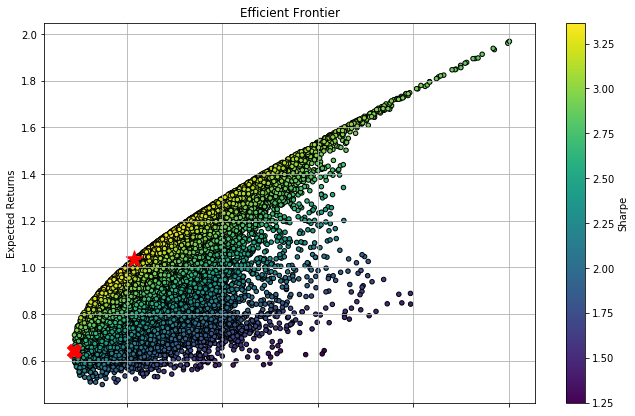

In [14]:
df.plot.scatter(x="Risk",y="Returns", c="Sharpe", cmap="viridis", edgecolors = "k", figsize=(11,7), grid =True)
plt.scatter(x=max_sharpe.Risk, y= max_sharpe.Returns, c="r", marker="*", s=300)
plt.scatter(x=min_risk.Risk, y= min_risk.Returns, c="r", marker="X", s=200)
plt.title("Efficient Frontier")
plt.xlabel("Risk")
plt.ylabel("Expected Returns")
plt.show()

In [15]:
max_sharpe

,Returns,Risk,Sharpe,삼성전자,한컴위드,TSLA,CHWY
9594,1.034117,0.307228,3.365959,0.43926,0.095775,0.306324,0.158642


In [16]:
min_risk

,Returns,Risk,Sharpe,삼성전자,한컴위드,TSLA,CHWY
16409,0.639768,0.24416,2.620285,0.652384,0.103488,0.058829,0.185299
